In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/sample_data/IMDb Movies India.csv.zip", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:

print("Original column names:", df.columns.tolist())

df.columns = df.columns.str.strip()
df.rename(columns={
    'Name': 'title',
    'Genre': 'genre',
    'Director': 'director',
    'Year': 'year',
    'Duration': 'duration',
    'Rating': 'rating',
    'Votes': 'votes'
}, inplace=True)

df = df[['title', 'genre', 'director', 'year', 'duration', 'rating', 'votes']]

df = df.dropna(subset=['rating', 'votes'])

df['year'] = df['year'].astype(str).str.replace(r'[()]', '', regex=True).astype(float)
df['duration'] = df['duration'].astype(str).str.replace(' min', '', regex=False)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df.dropna(subset=['duration'], inplace=True)

df['votes'] = df['votes'].astype(str).str.replace(',', '', regex=False)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df.dropna(subset=['votes'], inplace=True)

df.drop_duplicates(inplace=True)


# Check result
print("Cleaned DataFrame shape:", df.shape)
print("Cleaned DataFrame head:")
display(df.head())

Original column names: ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
Cleaned DataFrame shape: (5851, 7)
Cleaned DataFrame head:


,title,genre,director,year,duration,rating,votes
1,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,2019.0,109.0,7.0,8
3,#Yaaram,"Comedy, Romance",Ovais Khan,2019.0,110.0,4.4,35
5,...Aur Pyaar Ho Gaya,"Comedy, Drama, Musical",Rahul Rawail,1997.0,147.0,4.7,827
6,...Yahaan,"Drama, Romance, War",Shoojit Sircar,2005.0,142.0,7.4,1086
8,?: A Question Mark,"Horror, Mystery, Thriller",Allyson Patel,2012.0,82.0,5.6,326


In [ ]:
# Encode categorical features
label_encoders = {}

categorical_cols = ['genre', 'director']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [ ]:

X = df[['genre', 'director', 'year', 'duration', 'votes']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4680, 5)
Shape of y_train: (4680,)
Shape of X_test: (1171, 5)
Shape of y_test: (1171,)


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 1.1211101029802697
R² Score: 0.32444141424784056


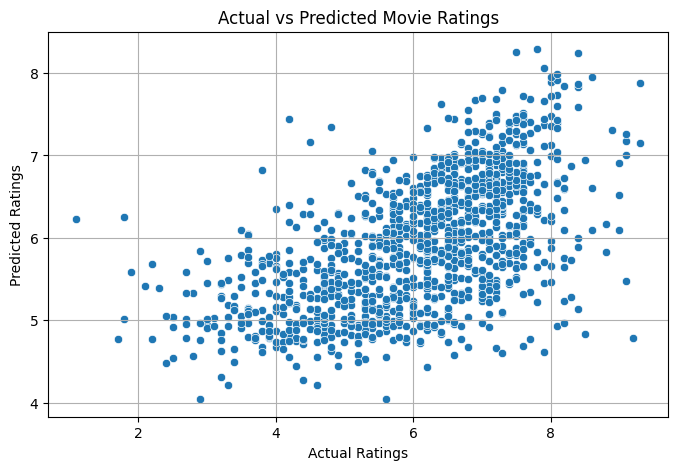

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()


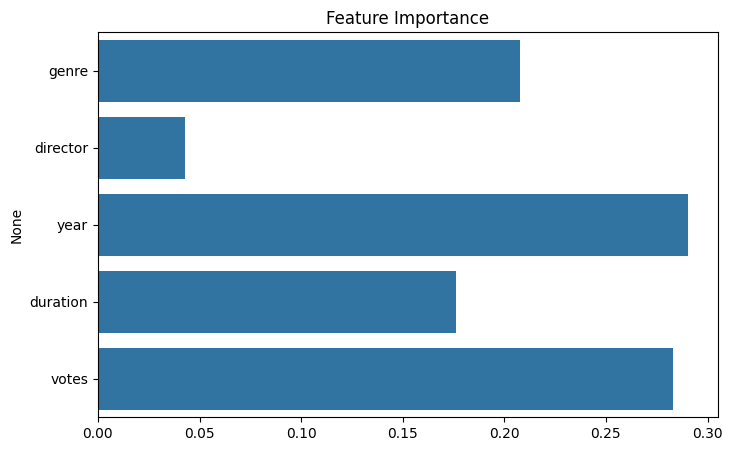

In [ ]:
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()
